In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns

Using TensorFlow backend.


In [144]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [3]:
y_true = yts

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


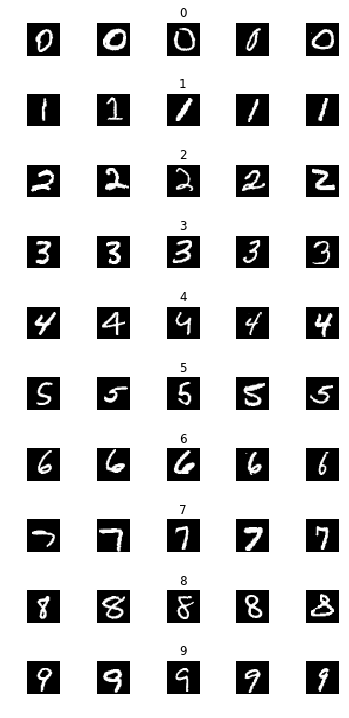

In [5]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i ==2:
            axes[j][i].set_title(str(j))

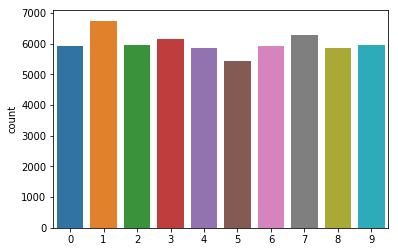

In [6]:
sns.countplot(ytr)
plt.show()

# Pre-processing

In [7]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)
xtr = xtr/255

In [8]:
xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255

# OneHotEncoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10) #10 represents number of classes/categories
yts = to_categorical(yts,10)

In [10]:
ytr.shape[1]

10

# creating Nural Net model

In [11]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [118]:
def create_model():
    model = Sequential()
    model.add(Conv2D(40,kernel_size=(5,5),input_shape = (28,28,1),
                     activation='relu'))
    model.add(Conv2D(32,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 40)        1040      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        32032     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 855,098
Trainable params: 855,098
Non-trainable params: 0
________________________________________________

In [119]:
h = model.fit(xtr,ytr,epochs=10,validation_data=(xts,yts),verbose=1,
             batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1117 - accuracy: 0.9656 - val_loss: 0.0476 - val_accuracy: 0.9846
Epoch 2/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0362 - val_accuracy: 0.9887
Epoch 3/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 4/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0381 - val_accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] - 166s

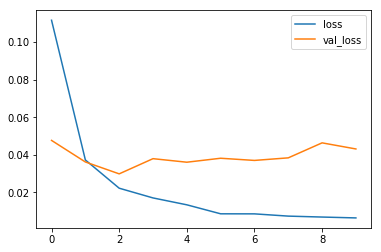

In [120]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

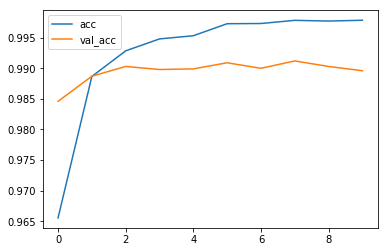

In [121]:
plt.plot(h.history['accuracy'],label='acc')
plt.plot(h.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

# Predicting images

In [122]:
import cv2

In [139]:
img = cv2.imread(r"C:\Users\shamaun\Desktop\Datasets\digit2.png")

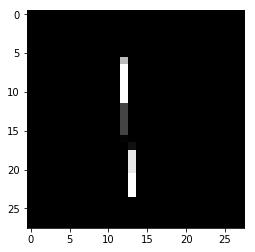

In [140]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [141]:
img = img.reshape(1,28,28,1)
img = img/255

In [142]:
model.predict_classes(img)

array([4], dtype=int64)

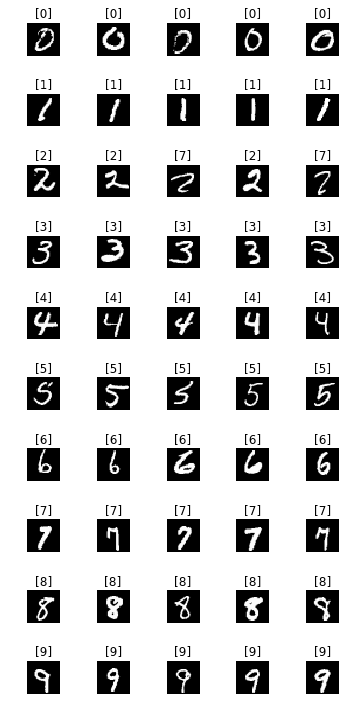

In [146]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xts[yts==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        axes[j][i].set_title(str(model.predict_classes(selected_image.reshape(1,28,28,1))))